In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [3]:
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv") 
test_data= pd.read_csv("/kaggle/input/spaceship-titanic/test.csv") 

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
train_data.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [7]:
train_data.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService

In [8]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train_data['totalexpense']=train_data['RoomService']+train_data['FoodCourt']+train_data['ShoppingMall']+train_data['Spa']+train_data['VRDeck']

In [10]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,totalexpense
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [11]:
train_dataset=train_data.copy()
train_dataset=train_dataset.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

In [12]:
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,totalexpense
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0


In [13]:
train_dataset['Age'].fillna(train_dataset['Age'].mean(), inplace=True)
train_dataset['VIP'].fillna('False', inplace=True)
train_dataset['totalexpense'].fillna(train_dataset['totalexpense'].mean(), inplace=True)
train_dataset['Transported'].fillna('False', inplace=True)
train_dataset['Destination'].fillna('Unknown',inplace=True)
train_dataset['Cabin'].fillna('0', inplace=True)
train_dataset['HomePlanet'].fillna('Unknown',inplace=True)
train_dataset['CryoSleep'].fillna('False',inplace=True)
train_dataset['Name'].fillna('Unknown', inplace=True)

In [14]:
train_dataset.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
Name            0
Transported     0
totalexpense    0
dtype: int64

In [15]:
train_dataset.shape

(8693, 10)

In [16]:
train_dataset.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
Name             object
Transported        bool
totalexpense    float64
dtype: object

<Axes: xlabel='Transported', ylabel='Age'>

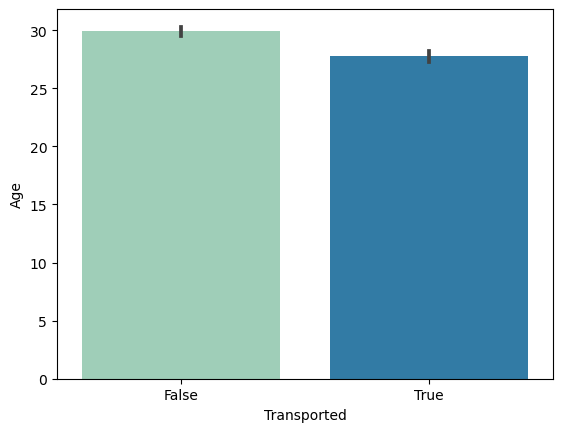

In [17]:
sns.barplot(x="Transported",y='Age',data=train_dataset,palette='YlGnBu')

<Axes: xlabel='HomePlanet', ylabel='Age'>

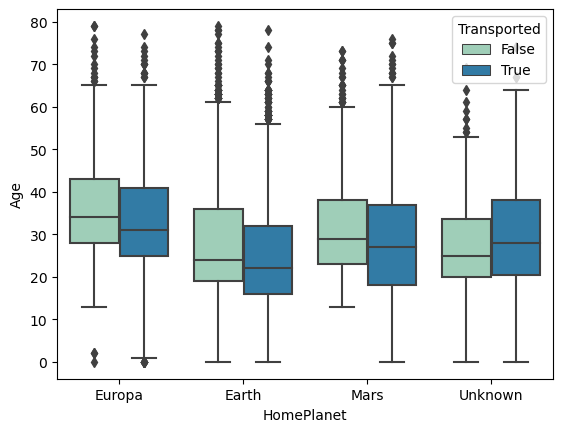

In [18]:
sns.boxplot(y="Age",x="HomePlanet",data=train_dataset,hue="Transported",palette="YlGnBu")

<Axes: xlabel='HomePlanet', ylabel='Age'>

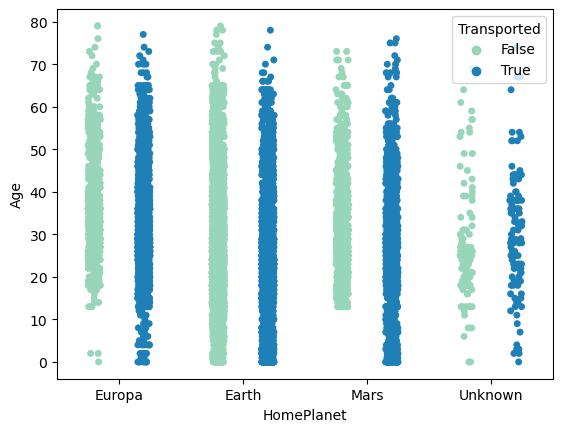

In [19]:
sns.stripplot(y="Age",x="HomePlanet",data=train_dataset,hue="Transported",palette="YlGnBu",dodge=True)

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'shape'
  cset = contour_func(


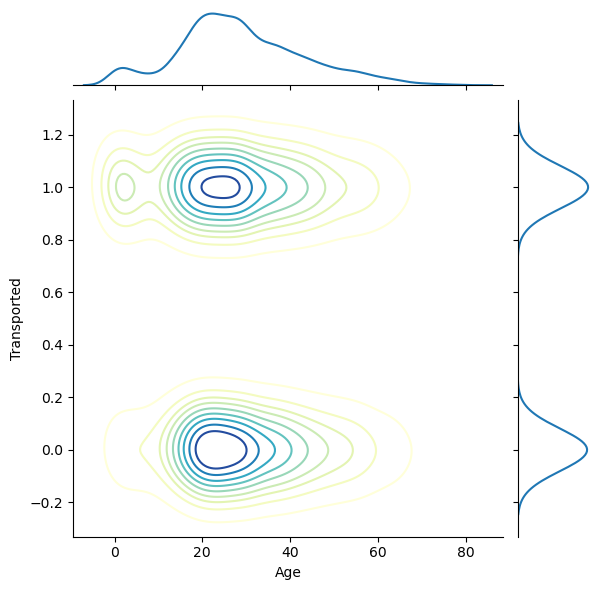

In [20]:
sns.jointplot(x='Age',y='Transported',data=train_dataset,kind='kde',shape=True,cmap="YlGnBu")

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
train_dataset[['CryoSleep', 'VIP', 'Transported']] = (train_dataset[['CryoSleep', 'VIP','Transported']] == True).astype(int)
train_dataset.HomePlanet=le.fit_transform(train_dataset.HomePlanet)
train_dataset.VIP=le.fit_transform(train_dataset.VIP)
train_dataset.CryoSleep=le.fit_transform(train_dataset.CryoSleep)


In [23]:
train_dataset.Destination=le.fit_transform(train_dataset.Destination)

In [24]:
train_dataset[['Cabin_deck','Cabin_num','Cabin_side']]=train_dataset['Cabin'].str.split("/",expand=True)

In [25]:
train_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,totalexpense,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1,0,B/0/P,2,39.0,0,Maham Ofracculy,0,0.0,B,0,P
1,0002_01,0,0,F/0/S,2,24.0,0,Juanna Vines,1,736.0,F,0,S
2,0003_01,1,0,A/0/S,2,58.0,1,Altark Susent,0,10383.0,A,0,S
3,0003_02,1,0,A/0/S,2,33.0,0,Solam Susent,0,5176.0,A,0,S
4,0004_01,0,0,F/1/S,2,16.0,0,Willy Santantines,1,1091.0,F,1,S


In [26]:
train_dataset.Cabin_deck=le.fit_transform(train_dataset.Cabin_deck)
train_dataset.Cabin_num=le.fit_transform(train_dataset.Cabin_num)
train_dataset.Cabin_side=le.fit_transform(train_dataset.Cabin_side)

In [27]:
train_dataset.corr()

/tmp/ipykernel_20/2043526507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()


,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,totalexpense,Cabin_deck,Cabin_num,Cabin_side
HomePlanet,1.000000,0.080988,0.042618,0.123121,0.114819,0.107755,0.123389,-0.338208,0.007214,0.006099
CryoSleep,0.080988,1.000000,-0.097877,-0.070736,-0.078281,0.460132,-0.357884,0.006302,0.013693,0.028419
Destination,0.042618,-0.097877,1.000000,-0.004207,-0.045351,-0.104817,-0.091493,0.170279,-0.018245,-0.015758
Age,0.123121,-0.070736,-0.004207,1.000000,0.091574,-0.074249,0.178034,-0.222232,-0.000695,0.011757
VIP,0.114819,-0.078281,-0.045351,0.091574,1.000000,-0.037261,0.159296,-0.166162,0.008614,-0.006057
Transported,0.107755,0.460132,-0.104817,-0.074249,-0.037261,1.000000,-0.187065,-0.104786,0.019015,0.093319
totalexpense,0.123389,-0.357884,-0.091493,0.178034,0.159296,-0.187065,1.000000,-0.345314,0.012975,0.006851
Cabin_deck,-0.338208,0.006302,0.170279,-0.222232,-0.166162,-0.104786,-0.345314,1.000000,-0.133826,-0.198261
Cabin_num,0.007214,0.013693,-0.018245,-0.000695,0.008614,0.019015,0.012975,-0.133826,1.000000,0.113086
Cabin_side,0.006099,0.028419,-0.015758,0.011757,-0.006057,0.093319,0.006851,-0.198261,0.113086,1.000000


/tmp/ipykernel_20/440627670.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr(),annot=True)


<Axes: >

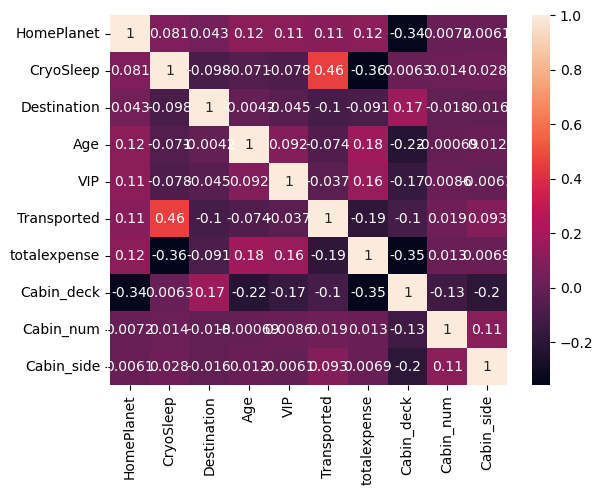

In [28]:
sns.heatmap(train_dataset.corr(),annot=True)

/tmp/ipykernel_20/4038613893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr()[['Transported']],annot=True)


<Axes: >

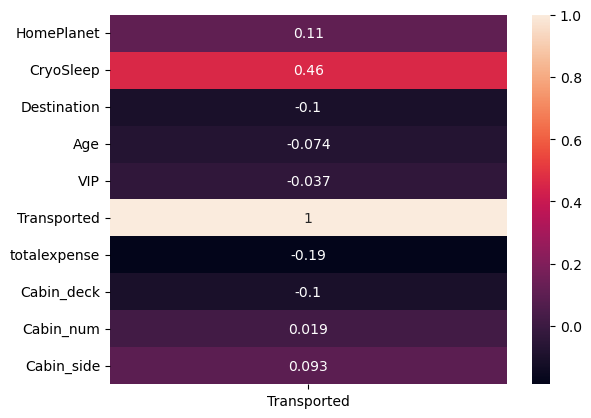

In [29]:
sns.heatmap(train_dataset.corr()[['Transported']],annot=True)

In [30]:
train_dataset.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,totalexpense,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,1,0,B/0/P,2,39.0,0,Maham Ofracculy,0,0.0,2,0,0
1,0002_01,0,0,F/0/S,2,24.0,0,Juanna Vines,1,736.0,6,0,1


In [31]:
x=train_dataset.drop(['PassengerId','Cabin','Name','Transported'], axis=1)
y=train_dataset.Transported

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [33]:
r=RandomForestClassifier()
r.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
p=r.predict(x_test)

In [35]:
r.score(x_test,y_test)

0.7503834355828221

In [36]:
test_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [37]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [38]:
test_data.shape

(4277, 13)

In [39]:
test_data['totalexpense']=test_data['RoomService']+test_data['FoodCourt']+test_data['ShoppingMall']+test_data['Spa']+test_data['VRDeck']

In [40]:
test_dataset=test_data.copy()
test_dataset=test_dataset.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

In [41]:
test_dataset['Age'].fillna(test_dataset['Age'].mean(), inplace=True)
test_dataset['VIP'].fillna('False', inplace=True)
test_dataset['totalexpense'].fillna(test_dataset['totalexpense'].mean(), inplace=True)
test_dataset['Destination'].fillna('Unknown',inplace=True)
test_dataset['Cabin'].fillna('0', inplace=True)
test_dataset['HomePlanet'].fillna('Unknown',inplace=True)
test_dataset['CryoSleep'].fillna('False',inplace=True)
test_dataset['Name'].fillna('Unknown', inplace=True)

In [42]:
test_dataset[['CryoSleep', 'VIP']] = (test_dataset[['CryoSleep', 'VIP']] == True).astype(int)

In [43]:
test_dataset.HomePlanet=le.fit_transform(test_dataset.HomePlanet)
test_dataset.VIP=le.fit_transform(test_dataset.VIP)
test_dataset.CryoSleep=le.fit_transform(test_dataset.CryoSleep)
test_dataset.Destination=le.fit_transform(test_dataset.Destination)

In [44]:
test_dataset[['Cabin_deck','Cabin_num','Cabin_side']]=test_dataset['Cabin'].str.split("/",expand=True)

In [45]:
test_dataset.Cabin_deck=le.fit_transform(test_dataset.Cabin_deck)
test_dataset.Cabin_num=le.fit_transform(test_dataset.Cabin_num)
test_dataset.Cabin_side=le.fit_transform(test_dataset.Cabin_side)

In [46]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,totalexpense,Cabin_deck,Cabin_num,Cabin_side
0,0013_01,0,1,G/3/S,2,27.0,0,Nelly Carsoning,0.0,7,820,1
1,0018_01,0,0,F/4/S,2,19.0,0,Lerome Peckers,2832.0,6,927,1
2,0019_01,1,1,C/0/S,0,31.0,0,Sabih Unhearfus,0.0,3,0,1
3,0021_01,1,0,C/1/S,2,38.0,0,Meratz Caltilter,7418.0,3,1,1
4,0023_01,0,0,F/5/S,2,20.0,0,Brence Harperez,645.0,6,1029,1


In [47]:
X_test=test_dataset.drop(['PassengerId','Cabin','Name'], axis=1)

In [48]:
t_p=r.predict(X_test)

In [49]:
test_dataset['Transported']=r.predict(X_test)

In [50]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,totalexpense,Cabin_deck,Cabin_num,Cabin_side,Transported
0,0013_01,0,1,G/3/S,2,27.0,0,Nelly Carsoning,0.0,7,820,1,1
1,0018_01,0,0,F/4/S,2,19.0,0,Lerome Peckers,2832.0,6,927,1,0
2,0019_01,1,1,C/0/S,0,31.0,0,Sabih Unhearfus,0.0,3,0,1,1
3,0021_01,1,0,C/1/S,2,38.0,0,Meratz Caltilter,7418.0,3,1,1,0
4,0023_01,0,0,F/5/S,2,20.0,0,Brence Harperez,645.0,6,1029,1,0


In [51]:
test_dataset['Transported'] = test_dataset['Transported'].astype(float).astype(bool)

In [52]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,totalexpense,Cabin_deck,Cabin_num,Cabin_side,Transported
0,0013_01,0,1,G/3/S,2,27.0,0,Nelly Carsoning,0.0,7,820,1,True
1,0018_01,0,0,F/4/S,2,19.0,0,Lerome Peckers,2832.0,6,927,1,False
2,0019_01,1,1,C/0/S,0,31.0,0,Sabih Unhearfus,0.0,3,0,1,True
3,0021_01,1,0,C/1/S,2,38.0,0,Meratz Caltilter,7418.0,3,1,1,False
4,0023_01,0,0,F/5/S,2,20.0,0,Brence Harperez,645.0,6,1029,1,False


In [53]:
submission =test_dataset.copy()
submission = submission.drop(['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','Name','totalexpense','Cabin_deck','Cabin_num','Cabin_side'],axis=1)
submission.reset_index(drop=True, inplace=True)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [54]:
submission.to_csv('submission.csv',index=False)

In [55]:
examp=pd.read_csv("/kaggle/working/submission.csv")

In [56]:
examp.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
